In [1]:
import importlib,sys,local_utils
from local_utils import *

Translated from [introduction_FR](./introduction_FR.ipynb)

# The Pascal tiling

## Project Origin

This repository presents my work on a theorem linking the properties of Pascal's triangle and prime numbers.

This project stems from an observation made in April 2025, during the preparation for the *Grand Oral* exam of the 2025 French Baccalauréat, in the context of a Computer Science (NSI) class.


## Example of the Pascal tiling Construction

Let us take the [Pascal triangle](https://en.wikipedia.org/wiki/Pascal%27s_triangle) formed by its first $N$ rows (with indices ranging from 0 to $N{-}1$).
If we align all rows to the left side of a matrix and then symmetrize the lower-left triangle of this matrix, we obtain the matrix $A$, illustrated below for $N=5$:

$$A=
\left(\begin{array}{cccccc}
1 & 0 & 0 & 0 & 0\\
1 & 1 & 0 & 0 & 0\\
1 & 2 & 1 & 0 & 0\\
1 & 3 & 3 & 1 & 0\\
1 & 4 & 6 & 4 & 1\\
\end{array}\right)
+
\left(\begin{array}{cccccc}
0 & 1 & 1 & 1 & 1\\
0 & 0 & 2 & 3 & 4\\
0 & 0 & 0 & 3 & 6\\
0 & 0 & 0 & 0 & 4\\
0 & 0 & 0 & 0 & 0\\
\end{array}\right)
=
\left(\begin{array}{cccccc}
1 & 1 & 1 & 1 & 1\\
1 & 1 & 2 & 3 & 4\\
1 & 2 & 1 & 3 & 6\\
1 & 3 & 3 & 1 & 4\\
1 & 4 & 6 & 4 & 1\\
\end{array}\right)
$$


Next, we create a matrix $B$ by reversing the order of the rows of Pascal's triangle, then aligning the triangle to the right side of the matrix, (i.e. rotating the Pascal's triangle by 180°), before symmetrizing the opposite triangle.


$$B=
\left(
\begin{array}{cccccc}
1 & 4 & 6 & 4 & 1\\
0 & 1 & 3 & 3 & 1\\
0 & 0 & 1 & 2 & 1\\
0 & 0 & 0 & 1 & 1\\
0 & 0 & 0 & 0 & 1\\
\end{array}
\right)
+
\left(\begin{array}{cccccc}
0 & 0 & 0 & 0 & 0\\
4 & 0 & 0 & 0 & 0\\
6 & 3 & 0 & 0 & 0\\
4 & 3 & 2 & 0 & 0\\
1 & 1 & 1 & 1 & 0\\
\end{array}\right)
=\left(
\begin{array}{cccccc}
1 & 4 & 6 & 4 & 1\\
4 & 1 & 3 & 3 & 1\\
6 & 3 & 1 & 2 & 1\\
4 & 3 & 2 & 1 & 1\\
1 & 1 & 1 & 0 & 1\\
\end{array}\right)
$$

We then define the matrix $S$ as the sum of matrix $A$ and matrix $B$.

$$
S=A+B=
\left(
\begin{array}{cccccc}
2 & 5 & 7 & 5 & 2\\
5 & 2 & 5 & 6 & 5\\
7 & 5 & 2 & 5 & 7\\
5 & 6 & 5 & 2 & 5\\
2 & 5 & 7 & 5 & 2\\
\end{array}
\right)
$$

We construct the matrix $D$, filled with 0s and 1s, by applying the following rule:

The element $D_{i,j}$ (row $i$, column $j$) is set to 0 if $S_{i,j}$ is a multiple of $N$, and $D_{i,j} = 1$ otherwise.

$$
D =
\left(
\begin{array}{ccccc}
1 & 0 & 1 & 0 & 1 \\
0 & 1 & 0 & 1 & 0 \\
1 & 0 & 1 & 0 & 1 \\
0 & 1 & 0 & 1 & 0 \\
1 & 0 & 1 & 0 & 1 \\
\end{array}
\right)
$$

If we visualize this matrix as an image where pixels are black when $D_{i,j} = 0$ and white otherwise, we observe that the resulting image corresponds to a regular tiling for $N = 5$.

This construction can be automated using the function `AffichageDamierPascal`, which takes $N$ as its default input.


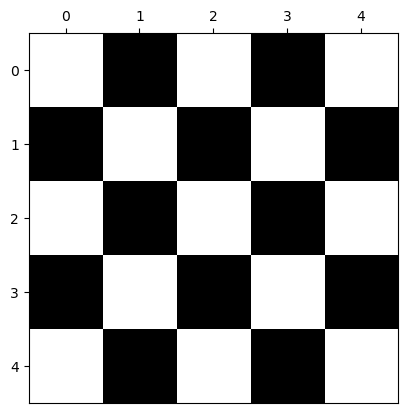

In [4]:
AffichageDamierPascal(5)

For $N = 14$, we obtain the following image, which does not form a regular tiling, as can be seen below.


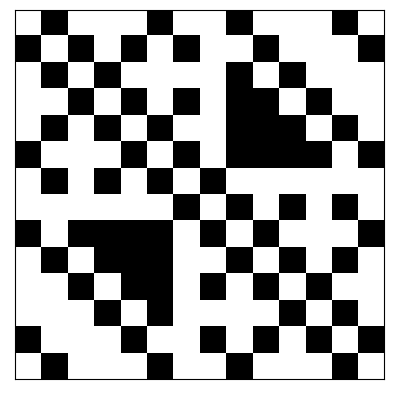

In [5]:
AffichageDamierPascal(14)

## The Pascal tiling theorem

### Definition of the Pascal tiling

We denote by $\binom{n}{k}$ the binomial coefficient defined as $\frac{n!}{k!(n-k)!}$.

By generalizing the previous construction rules, we aim to compute $S_{i,j}$, the element at row $i$ and column $j$ of the matrix $S = A + B$, with $i$ and $j$ integers ranging from 0 to $Z = N - 1$ (inclusive).

We first observe that by construction, $S_{i,j} = S_{j,i}$.

Then, for $j \leq i$, we obtain the following expression for $S_{i,j}$, which appears as the sum of two binomial coefficients from Pascal's triangle:

$$
S_{i,j} = \binom{i}{j} + \binom{Z{-}j}{Z{-}i} = \binom{i}{j} + \binom{Z{-}j}{i{-}j}
$$

The second expression follows from the symmetry property of binomial coefficients: $\binom{a}{b} = \binom{a}{a - b}$.

Finally, the matrix $D$ is also symmetric, and for $j \leq i$, its elements are given by:

$$
D_{i,j} = \mathrm{min}\left(1, S_{i,j} \bmod N \right)
$$

Here, the notation $S_{i,j} \bmod N$ denotes the modulo operation.

Alternatively, we can write:

$$
D_{j,i} = D_{i,j} =
\begin{cases}
  0 & \text{if } S_{i,j} \equiv 0 \mod N \\
  1 & \text{otherwise}
\end{cases}
$$

If $D_{i,j} = 0$, the corresponding tile is black; otherwise, it is white.

We say that the Pascal Ttling is **regular** if it forms a perfect alternation of black and white tiles when moving one step vertically or horizontally.

### Theorem

**The Pascal tiling theorem states that the matrix $D(N)$ forms a regular checkerboard-style tiling of size $N \times N$—with white tiles at the corners—if and only if $N$ is a prime number strictly greater than 2.**


## Project Objectives

As part of this project, I first aimed to verify that the theorem holds for a large number of values of $N$, using Python programs.

Although I did not find a counterexample, this investigation allowed me to explore the remarkable richness of Pascal’s triangle, and ultimately led me to a mathematical proof of the theorem.

The results are presented in the following notebooks:

- [Verification](./verification_EN.ipynb) of the theore: This notebook contains several programs used to test the conjecture for all values between $3$ and $N = 10,\!000$.

- [Proof](./demonstration_EN.ipynb) of the Pascal tiling theorem: This notebook presents a mathematical proof.

- [Application 1/2](./fibonacci_EN.ipynb) to Fibonacci and Lucas number of the Pascal tiling theorem: This notebook presents applications and discussion for instance including properties of pseudo-prime numbers.

- [Application 2/2](./p_puissance_n_EN.ipynb) to the case $N=p^n$ with $p$ a prime number strictly greater than $2$, for which the matrices $S$ and $W$ modulo $p$, can be constructed recursively.



## Acknowledgments

I would like to thank my Computer Science teacher and my father.

I thank them both for:
- encouraging me to try proving it on my own,
- helping me formalize the conjecture and its proof,
- supporting me as I explored various avenues,
- helping to generalize the recurrence formula used in proving Property G,
- helping to formalize and prove the conjecture stated at the beginning of Property H.2.


## Contact

You can reach me at: etienne@rousseaubottin.fr